IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

READING DATA FROM .CSV FILE

In [ ]:
df = pd.read_csv('/content/eighthr.csv')

DATA PREPROCESSING

In [ ]:
print(df.shape)
df.head()

(2534, 74)


,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.58,0


In [ ]:
df.describe()

,Result
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


DROPPING DATE COLUMN

In [ ]:
df.drop(columns='Date', inplace=True)

In [ ]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.58,0


REPLACE MISSING VALUES

In [ ]:
df.replace(to_replace='?', value=np.nan, inplace=True)

In [ ]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


STORE TARGET TO BE PREDICTED IN Y

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
df = pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns = ['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp','Result']
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,6.700000,0.11000,3.830000,0.140000,1612.00000,-2.300000,0.300000,7.180000,0.120000,3178.500000,-15.50000,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,9.000000,0.25000,-0.410000,9.530000,1594.50000,-2.200000,0.960000,8.240000,7.300000,3172.000000,-14.50000,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,9.000000,0.56000,0.890000,10.170000,1568.50000,0.900000,0.540000,3.800000,4.420000,3160.000000,-15.90000,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.900000,0.89000,-0.340000,8.580000,1546.50000,3.000000,0.770000,4.170000,8.110000,3145.500000,-16.80000,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2.0,3.0,3.0,3.1,3.1,2.7,3.0,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1,26.0,21.1,13.575298,0.57732,2.136487,1.662464,1531.49426,5.931129,0.406445,5.459634,0.994001,3145.420501,-10.51141,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0


In [ ]:
# check if NaN values exist
if np.nan in df['T_PK'].values.tolist():
  print("NaN values found")
else:
  print("No NaN values found")

No NaN values found


In [ ]:
# Cleaning data using Imputer Class
X = imputer.fit_transform(X)

SPLIT THE DATA INTO TRAIN AND TEST SETS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=9)

VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

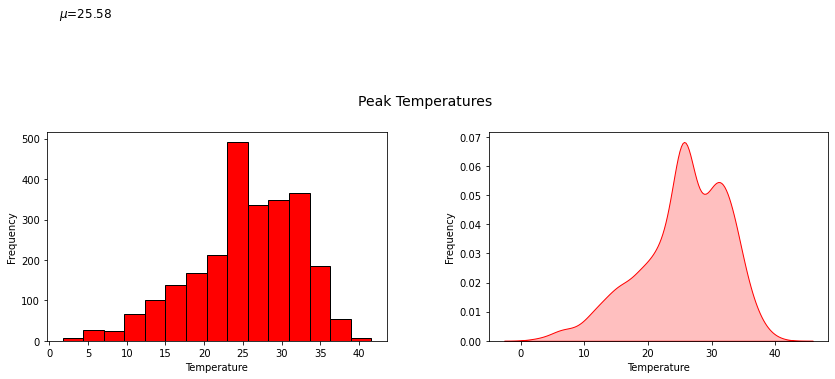

In [ ]:
# Peak Temperatures Plot
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak Temperatures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['T_PK'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['T_PK'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='red')

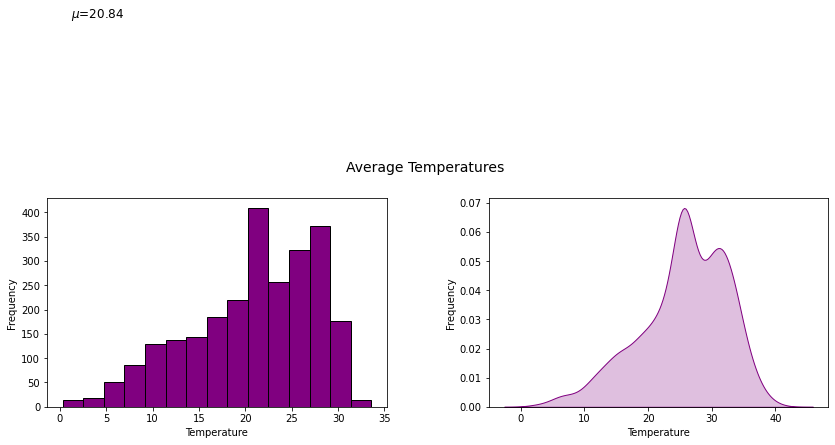

In [ ]:
# Average Temperatures plot
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Average Temperatures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['T_AV'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['T_AV'], color='purple', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='purple')

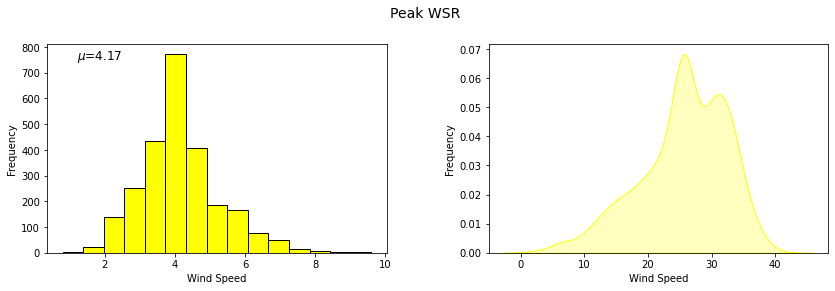

In [ ]:
# Peak Wind Speed Plots
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak WSR", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Frequency") 
ax.text(1.2, 750, r'$\mu$='+str(round(df['WSR_PK'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['WSR_PK'], color='yellow', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Wind Speed")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='yellow')

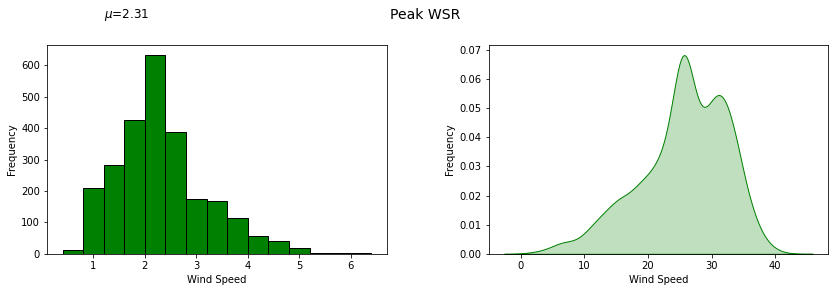

In [ ]:
# Average Wind Speed Plots
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak WSR", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Frequency") 
ax.text(1.2, 750, r'$\mu$='+str(round(df['WSR_AV'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['WSR_AV'], color='green', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Wind Speed")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='green')

In [ ]:
# Factorplot
# Here we try to establish a relation between Peak temperature and the result.
df['ozone_label'] = df['Result'].apply(lambda value: 'Non Ozone Day' if value == 0 else 'Ozone Day')
df['ozone_label'] = pd.Categorical(df['ozone_label'], categories=['Non Ozone Day', 'Ozone Day'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


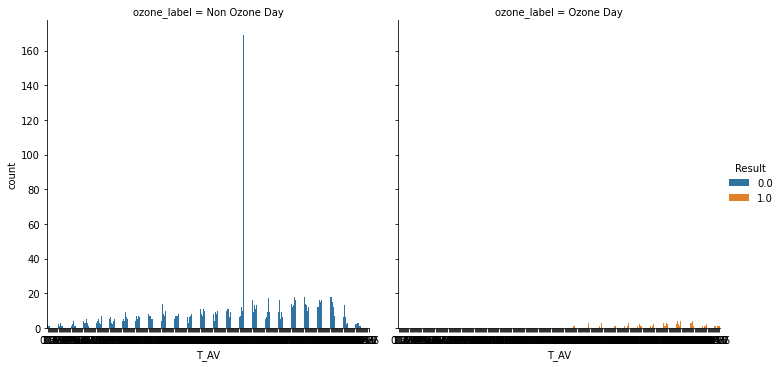

In [ ]:
fc = sns.factorplot(x="T_AV", hue="Result", col="ozone_label", 
                    data=df, kind="count")

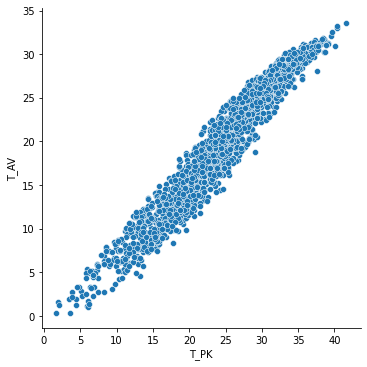

In [ ]:
# Relationship among peak and average temperature
#Join Plot
sns.relplot(x = 'T_PK', y = 'T_AV', data = df)
plt.show()

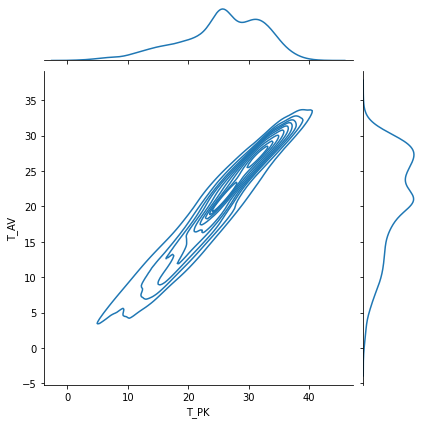

In [ ]:
sns.jointplot(x = df['T_PK'], y = df['T_AV'], kind = 'kde')

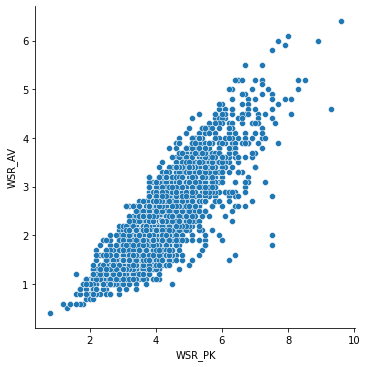

In [ ]:
# Relationship between average and peak wind speed
sns.relplot(x = 'WSR_PK', y = 'WSR_AV', data = df)
plt.show()

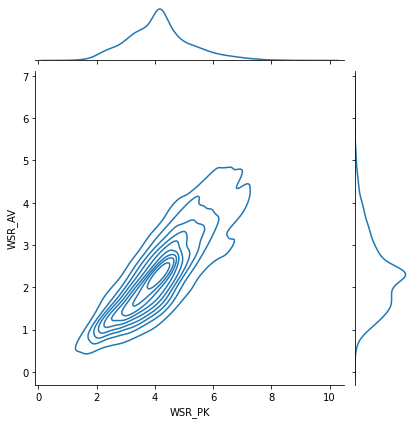

In [ ]:
sns.jointplot(x = df['WSR_PK'], y = df['WSR_AV'], kind = 'kde')

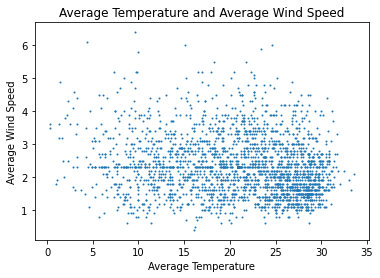

In [ ]:
#Scatter Plot
plt.scatter(df.T_AV, df.WSR_AV, 1)
plt.title('Average Temperature and Average Wind Speed')
plt.xlabel('Average Temperature')
plt.ylabel('Average Wind Speed')
plt.show()

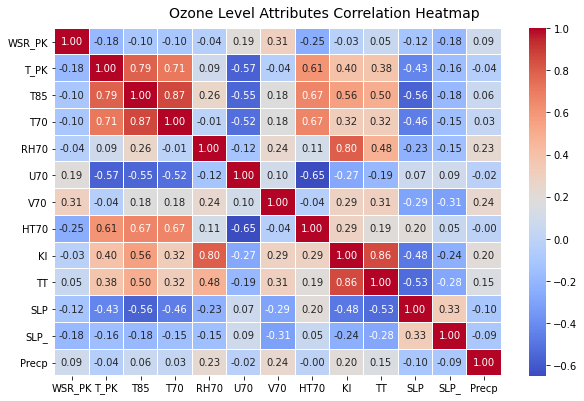

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
subset_attributes = ['WSR_PK','T_PK','T85','T70','RH70','U70','V70','HT70','KI','TT','SLP','SLP_','Precp']
corr = df[subset_attributes].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Ozone Level Attributes Correlation Heatmap', fontsize=14)

MODEL TRAINING AND TESTING

In [ ]:
# Support Vector Machine 
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, Y_train)
Y_pred =clf.predict(X_test)

In [ ]:
# Jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,Y_pred,average='macro')

0.4714003944773176

In [ ]:
# Accuracy Score
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test,Y_pred))

Accuracy: 0.9428007889546351


In [ ]:
# Average precision score 
from sklearn.metrics import average_precision_score
average_precision_score(Y_test,Y_pred)

0.05719921104536489

In [ ]:
# Roc auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred,average='macro')

0.5

In [ ]:
# K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

In [ ]:
# Jaccard Score 
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,Y_pred,average='macro')

0.4714003944773176

In [ ]:
# Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(Y_test,Y_pred)

0.05719921104536489

In [ ]:
# Accuracy score 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9428007889546351


In [ ]:
# Roc auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred,average='macro')

0.5

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
# Extreme gradient Boosting Algorithm
import xgboost
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

In [ ]:
# Jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,Y_pred,average='macro')

0.5478691295424364

In [ ]:
# Accuracy score 
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9447731755424064


In [ ]:
# Average precision score 
from sklearn.metrics import average_precision_score
average_precision_score(Y_test,Y_pred)

0.14312271871953572

In [ ]:
# Roc auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred,average='macro')

0.5820227961333142

In [ ]:
# Light Gradient Boosting algorithm  
import lightgbm
from lightgbm import LGBMClassifier
lgbm= LGBMClassifier()
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)

In [ ]:
# Jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,Y_pred,average='macro')

0.5346669980119284

In [ ]:
# Accuracy score
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9447731755424064


In [ ]:
# Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(Y_test,Y_pred)

0.12812739868442785

In [ ]:
# Roc auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred,average='macro')

0.5658274419275717

In [ ]:
# Enable Histogram Gradient Boosting Algorithm 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb= HistGradientBoostingClassifier()
hgb.fit(X_train, Y_train)
Y_pred =hgb.predict(X_test)

In [ ]:
# Jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,Y_pred,average='macro')

0.5639629831246598

In [ ]:
# Accuracy score 
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9467455621301775


In [ ]:
# Average Precision Score
from sklearn.metrics import average_precision_score
average_precision_score(Y_test,Y_pred)

0.16950282255322044

In [ ]:
# Roc auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred,average='macro')

0.5992641754436588

In [ ]:
# Deep Neural Network  
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [ ]:
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)

model = Sequential()
model.add(Dense(100, kernel_initializer=initializer, input_dim=72, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(50, kernel_initializer=initializer, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer=initializer, activation= "sigmoid"))

model.summary() 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 100)               7300      
_________________________________________________________________
batch_normalization_42 (Batc (None, 100)               400       
_________________________________________________________________
dense_64 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_43 (Batc (None, 50)                200       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 51        
Total params: 13,001
Trainable params: 12,701
Non-trainable params: 300
_________________________________________________________________


In [ ]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss="binary_crossentropy" , optimizer=adam, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Fit Model
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9888 - val_loss: 0.2368 - val_accuracy: 0.9369
Epoch 2/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9882 - val_loss: 0.2523 - val_accuracy: 0.9448
Epoch 3/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.2353 - val_accuracy: 0.9507
Epoch 4/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9941 - val_loss: 0.2328 - val_accuracy: 0.9389
Epoch 5/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9868 - val_loss: 0.3031 - val_accuracy: 0.9428
Epoch 6/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.9914 - val_loss: 0.2991 - val_accuracy: 0.9448
Epoch 7/10
95/95 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9868 - val_loss: 0.4144 - val_accuracy: 0.9369
Epoch 8/10
95/95 [==

In [ ]:
model.evaluate(X,Y)

80/80 [==============================] - 0s 2ms/step - loss: 930.2311 - accuracy: 0.9369


[930.2311401367188, 0.9368587136268616]